In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [3]:
cols = ['pclass','sex','age','fare']
df = df[cols + ['survived']].dropna()
df.dtypes

,0
pclass,int64
sex,object
age,float64
fare,float64
survived,int64


In [8]:
df.isna().sum().sum()

0

In [4]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df

,pclass,sex,age,fare,survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
885,3,1,39.0,29.1250,0
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,1
889,1,0,26.0,30.0000,1


# ENTRENAMIENTO DE MODELO DE REGRESIÓN LOGISTICA

In [5]:
X = df[cols]
y = df['survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy:.2f}')


Accuracy : 0.74


# MATRIZ DE CONFUSIÓN

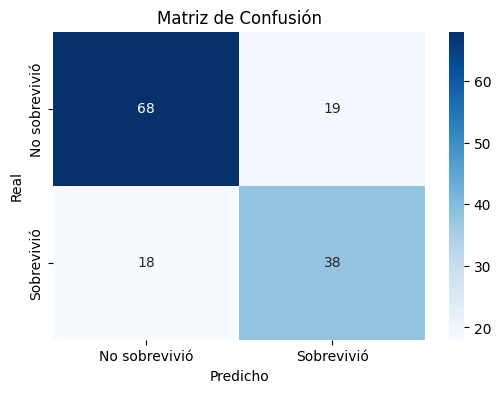

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# SOLVER

El solver es el algoritmo que scikit-learn usa para optimizar los coeficientes de la regresión logística. Diferentes solvers funcionan mejor en diferentes escenarios, dependiendo del tamaño del dataset y si los datos son escasos o densos.



*   lbfgs(default) datos pequeños o medianos
*   liblinear : datos pequeños ideal para regresión logistica binaria.
*   newton-cg : datos medianos a grandes
*   saga  : datos grandes



In [15]:
model2 = LogisticRegression(solver='liblinear')
model2.fit(X_train,y_train)

y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test,y_pred2)
print(f'Accuracy : {accuracy:.2f}')

Accuracy : 0.77


# PENALTY

Son tipos de regularización, una técnica utilizada para evitar el sobreajuste (overfitting) en los modelos de aprendizaje automático, como la Regresión Logística.

* L1 (Lasso) → Cuando tienes muchas variables y quieres eliminar las menos importantes (selección de características).
* L2 (Ridge) → Cuando todas las variables son importantes, pero necesitas evitar valores extremos en los coeficientes.
* ElasticNet → Si quieres una combinación de ambos métodos.


🔹 Recomendación: Prueba L1 si tienes muchas variables irrelevantes, L2 si todas las características importan y ElasticNet si necesitas ambas cosas.

In [21]:
model3 = LogisticRegression(solver='saga',penalty='l1')
model3.fit(X_train,y_train)

y_pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test,y_pred3)
print(f'Accuracy : {accuracy:.2f}')

Accuracy : 0.63


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# CLASS WEIGHT

ajusta automáticamente los pesos de las clases en función de su frecuencia en los datos de entrenamiento. Su propósito es manejar desbalances en la distribución de clases.
en el entrenamiento se debe considerar stratify

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
model4 = LogisticRegression(solver='saga',penalty='l1',class_weight='balanced')
model4.fit(X_train,y_train)

y_pred4 = model4.predict(X_test)

accuracy = accuracy_score(y_test,y_pred4)
print(f'Accuracy : {accuracy:.2f}')

Accuracy : 0.68


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# COMPARANDO MODELOS

In [22]:
from sklearn.metrics import classification_report

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
configs = [
    ('liblinear', 'l1', None),
    ('liblinear', 'l2', None),
    ('saga', 'l1', None),
    ('saga', 'l2', None),
    ('saga', 'elasticnet', 0.5),
    ('lbfgs', 'l2', None),
    ('saga', 'l1', 'balanced'),
    ('saga', 'l2', 'balanced'),
]

results = {}

for solver, penalty, class_weight in configs:
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        continue  # Algunos solvers no admiten L1
    if penalty == 'elasticnet' and solver != 'saga':
        continue  # Solo 'saga' soporta elasticnet

    model = LogisticRegression(solver=solver, penalty=penalty, l1_ratio=0.5 if penalty == 'elasticnet' else None, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[f'{solver} - {penalty} - {class_weight}'] = report

# Imprimir reportes de clasificación
for config, report in results.items():
    print(f'Configuración: {config}')
    print(classification_report(y_test, model.predict(X_test)))
    print('-' * 80)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Configuración: liblinear - l1 - None
              precision    recall  f1-score   support

           0       0.66      0.91      0.76        87
           1       0.65      0.27      0.38        56

    accuracy                           0.66       143
   macro avg       0.66      0.59      0.57       143
weighted avg       0.66      0.66      0.61       143

--------------------------------------------------------------------------------
Configuración: liblinear - l2 - None
              precision    recall  f1-score   support

           0       0.66      0.91      0.76        87
           1       0.65      0.27      0.38        56

    accuracy                           0.66       143
   macro avg       0.66      0.59      0.57       143
weighted avg       0.66      0.66      0.61       143

--------------------------------------------------------------------------------
Configuración: saga - l1 - None
              precision    recall  f1-score   support

           0       0.66